<a href="https://colab.research.google.com/github/everestso/Summer22/blob/main/LinearModelNotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models

In [1]:
### Includes
# Common imports
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

import math

In [2]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


[-13, -3, 3, 7, 15]


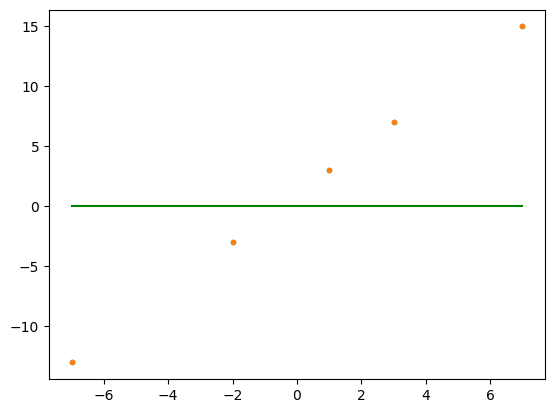

In [3]:
def RoundIt(x, p=0.01):
  return round(x-(p/2),3), round(x+(p/2),3)

eps = 5.0
coef = (1, 2)
w = (0, 0)
Noise = lambda eps: np.random.random()*eps - (eps/2)
G = lambda xIn: 1/(1+np.e**(-xIn))

F = lambda w, x: w[0] + w[1]*x
X = [-7, -2, 1, 3, 7]
Y = [F(coef, x) for x in X]
print (Y)

plt.plot(X,Y,'.')
Hxs = [F(w, x) for x in X]

plt.plot(X, Y, '.')
plt.plot(X, Hxs, '-', color="green")
plt.show()

In [ ]:
# Print Examples:

Examples = list(zip(X,Y))

for p in Examples:
  print (p)

(-7, -13)
(-2, -3)
(1, 3)
(3, 7)
(7, 15)


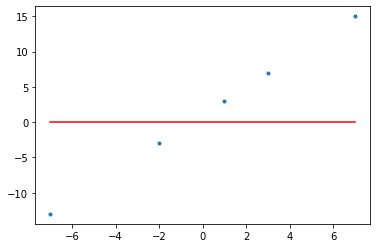

In [ ]:
# Plot Model
def PlotModel(X, Y, model):
  Hxs = [F(model, x) for x in X]

  plt.plot(X, Y, '.')
  plt.plot(X, Hxs, '-', color="red")
  plt.show()

PlotModel( X, Y , (0,0))

In [ ]:
SquaredError = lambda X, Y, w : sum([(y-F(w, x))**2 for x,y in zip(X,Y)])
SquaredErrorLogistic = lambda X, Y, w : sum([(y-G(F(w, x)))**2 for x,y in zip(X,Y)])


In [ ]:
print ("X=", X)
print ("Y=", Y)
w= (0,0)
w=(0,1)
w=(0,0)
Predicts = [F(w, x) for x in X]
Errors = [x*(y-F(w, x)) for x, y in zip(X,Y)]
print ("Predicts = ", Predicts)
print ("Errors=", Errors, sum(Errors), sum(Errors)/len(X))


X= [-7, -2, 1, 3, 7]
Y= [-13, -3, 3, 7, 15]
Predicts =  [0, 0, 0, 0, 0]
Errors= [91, 6, 3, 21, 105] 226 45.2


In [ ]:
ws= [(0,0), (0,1), (1,0), (1,1), (1,2)]
for model in ws:
  print (model, SquaredError(X, Y, model), RoundIt(SquaredError(X, Y, model), 1))

(0, 0) 461 (460.5, 461.5)
(0, 1) 121 (120.5, 121.5)
(1, 0) 448 (447.5, 448.5)
(1, 1) 112 (111.5, 112.5)
(1, 2) 0 (-0.5, 0.5)


In [ ]:
## Average Gradients
w = ws[0]
data = [(x,y) for x, y in zip(zip(np.ones(len(X)), X), Y)]
Gradients = np.array([ ( (y-F(w,x[1]))*x[0], (y-F(w,x[1]))*x[1] ) for (x, y) in data ])
print(Gradients)

[[-13.  91.]
 [ -3.   6.]
 [  3.   3.]
 [  7.  21.]
 [ 15. 105.]]


In [ ]:
GradientBatch = np.array([0.0, 0.0])
for g in Gradients:
  GradientBatch += g
GradientBatch = GradientBatch/len(Gradients)
print (GradientBatch)
for g in GradientBatch:
  print (g, RoundIt(g*0.01), g*0.01)

[ 1.8 45.2]
1.8 (0.013, 0.023) 0.018000000000000002
45.2 (0.447, 0.457) 0.452


In [ ]:
wNew = np.add(w, GradientBatch*learningRate)
print (w, SquaredError(X, Y, w))
for model in [np.add(w, GradientBatch*learningRate) for learningRate in (0.01, 0.1, 1.0)]:
  #print (model, SquaredError(X, Y, model))
  print (model, RoundIt(model[0],0.2), RoundIt(model[1],1))

(0, 0) 461
[0.018 0.452] (-0.082, 0.118) (-0.048, 0.952)
[0.18 4.52] (0.08, 0.28) (4.02, 5.02)
[ 1.8 45.2] (1.7, 1.9) (44.7, 45.7)


In [ ]:
print (SquaredError(X, Y, (0.018, 0.452)))
print (SquaredError(X, Y, (0.18, 4.52)))


279.28821199999993
706.3411999999998


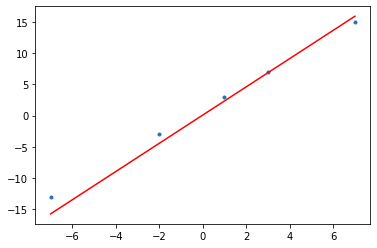

In [ ]:
PlotModel(X, Y, [0.09, 2.26])

# Logistic Regression

In [ ]:
Predict = lambda x: 1.0 if x > 0.5 else 0.0
w = (0,0)
Y = [Predict(G(F(coef, x))) for x in X]
for x, y in zip(X, Y):
  print (x, y)

-7 0.0
-2 0.0
1 1.0
3 1.0
7 1.0


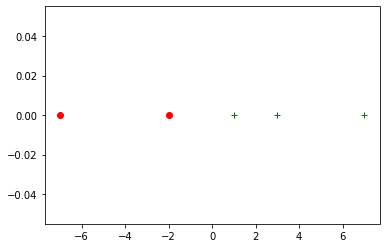

In [ ]:
def PlotLogisticData(X, Y, model):
  posX = []
  posY = []
  negX = []
  negY = []
  for x, y in zip(X,Y):
    if y:
      posX += [x]
      posY += [Predict(G(F(model,x)))]
    else:
      negX += [x]
      negY += [Predict(G(F(model,x)))]
  plt.plot(posX, posY, '+', color='green')
  plt.plot(negX, negY, 'o', color='red')
  plt.show()
PlotLogisticData(X, Y, w)

In [ ]:
print ("X=", X)
print ("Y=", Y)
w= (0,0)
w=(0,1)
w=(0,0)
Predicts = [F(w, x) for x in X]
Errors = [x*(y-G(F(w, x))) for x, y in zip(X,Y)]
print ("Predicts = ", Predicts)
print ("Errors=", Errors, sum(Errors), sum(Errors)/len(X))


X= [-7, -2, 1, 3, 7]
Y= [0.0, 0.0, 1.0, 1.0, 1.0]
Predicts =  [0, 0, 0, 0, 0]
Errors= [3.5, 1.0, 0.5, 1.5, 3.5] 10.0 2.0


In [ ]:
ws= [(0,0), (0,1), (1,0), (1,1), (1,2)]
for model in ws:
  print (model, SquaredErrorLogistic(X, Y, model), RoundIt(SquaredErrorLogistic(X, Y, model),0.1) )

(0, 0) 1.25 (1.2, 1.3)
(0, 1) 0.0887896982223366 (0.039, 0.139)
(1, 0) 1.2858817551625858 (1.236, 1.336)
(1, 1) 0.0868685548209095 (0.037, 0.137)
(1, 2) 0.004499256912790766 (-0.046, 0.054)


In [ ]:
## Average Gradients
w = ws[0]
data = [(x,y) for x, y in zip(zip(np.ones(len(X)), X), Y)]
Gradients = np.array([ ( (y-G(F(w,x[1])))*x[0], (y-G(F(w,x[1])))*x[1] ) for (x, y) in data ])
print(Gradients)

[[-0.5  3.5]
 [-0.5  1. ]
 [ 0.5  0.5]
 [ 0.5  1.5]
 [ 0.5  3.5]]


In [ ]:
GradientBatch = np.array([0.0, 0.0])
for g in Gradients:
  GradientBatch += g
GradientBatch = GradientBatch/len(Gradients)
print (GradientBatch)
print (X, Y)

[0.1 2. ]
[-7, -2, 1, 3, 7] [0.0, 0.0, 1.0, 1.0, 1.0]


In [ ]:
wNew = np.add(w, GradientBatch*learningRate)
print (wNew)
print (w)
print (SquaredErrorLogistic(X, Y, (0,0)))
print (w, SquaredErrorLogistic(X, Y, w))
for model in [np.add(w, GradientBatch*learningRate) for learningRate in (1, 1)]:
  print (model, SquaredErrorLogistic(X, Y, model))
  print (model, RoundIt(model[0],0.1), RoundIt(model[1],1.0))

[0.01 0.2 ]
(0, 0)
1.25
(0, 0) 1.25
[0.1 2. ] 0.012300762094024014
[0.1 2. ] (0.05, 0.15) (1.5, 2.5)
[0.1 2. ] 0.012300762094024014
[0.1 2. ] (0.05, 0.15) (1.5, 2.5)


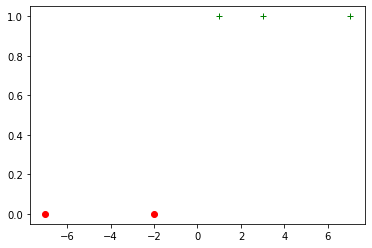

0.3010299956639812


In [ ]:
PlotLogisticData(X, Y, (0.1, 2))
print (np.log10(2))

In [ ]:
print (G(14.1))

0.9999992476022669
